In [2]:
G = graphs.PetersenGraph()

In [3]:
import random
from random import shuffle

def is_edge_bridge(graph, edge):
    #ustvarimo kopijo grafa in odstranimo povezavo, ki jo damo kot argument
    temp_graph = graph.copy()
    temp_graph.delete_edge(edge)

    # preverimo ali odstranitev povezave poveča število komponent
    return temp_graph.connected_components_number() > graph.connected_components_number()

In [4]:
def krom_ind(snark):
    n = snark.order()
    krom_indeks = []
    
    for _ in range(1,10):
        #izberemo dva naključna roba
        random_edge1 = random.choice(snark.edges(labels = False))
        random_edge2 = random.choice([edge for edge in snark.edges(labels = False) if edge != random_edge1])
        
        #na prvo povezavo dodamo dve vozlišči in jih povežemo
        snark.add_edge(random_edge1[0], n )
        snark.add_edge(n + 1, random_edge1[1])
        snark.add_edge(n , n + 1)
        
        #enako naredimo še na drugi povezavi
        snark.add_edge(random_edge2[0], n + 2)
        snark.add_edge(n + 3, random_edge2[1])
        snark.add_edge(n + 2, n + 3)
        
        #sedaj povežemo n in n+2 ter n+1 in n + 3
        snark.add_edge(n, n + 2)
        snark.add_edge(n + 1, n + 3)
        
        #na koncu še odstranimo povezavi, ki smo jih na začetku izbrali
        snark.delete_edge(random_edge1[0],random_edge1[1])
        snark.delete_edge(random_edge2[0],random_edge2[1])
        
        #poiščemo vse povezave, ki niso mostovi in jih damo v seznam
        non_bridge_edges = [edge for edge in snark.edges(labels = False) if not is_edge_bridge(snark, edge)]
        
        non_bridge_edges1 = []
        for edge in non_bridge_edges:
                u, v = edge
                neighbors_u = set(snark.neighbors(u))
                neighbors_v = set(snark.neighbors(v))
                neighbors_u.remove(v)
                neighbors_v.remove(u)
        
                # preverimo, da u in v nimata skupnih sosedov in da imata 3 sosede, saj dreugače metoda ne deluje
                if not neighbors_u.intersection(neighbors_v) and len(set(snark.neighbors(u))) == 3 and len(set(snark.neighbors(v))) == 3:
                    non_bridge_edges1.append(edge)
        
        
        edge1 = random.choice( non_bridge_edges1)
        non_bridge_edges1.remove(edge1)
        filtered_edges = [edge for edge in  non_bridge_edges1 if edge1[0] not in edge and edge1[1] not in edge]
        
        
        #poiščemo sosede vozlišč u in v
        neighbors_u = list(snark.neighbors(edge1[0]))
        neighbors_u.remove(edge1[1])
        neighbors_v = list(snark.neighbors(edge1[1]))

        neighbors_v.remove(edge1[0])
        
        #odstranimo vozlišča u in v
        snark.delete_vertex(edge1[0])
        snark.delete_vertex(edge1[1])
        
        #povežemo enega od sosedov vozlišča u z enim sosedom vozlišča v in potem še druga dva
        snark.add_edge(neighbors_u[0], neighbors_v[0])
        snark.add_edge(neighbors_u[1], neighbors_v[1])
        
        non_bridge_edges2 = []
        for edge in filtered_edges:
                u, v = edge
                neighbors_u = set(snark.neighbors(u))
                neighbors_v = set(snark.neighbors(v))
                neighbors_u.remove(v)
                neighbors_v.remove(u)
        
                # preverimo, da u in v nimata skupnih sosedov in da imata 3 sosede, saj dreugače metoda ne deluje
                if not neighbors_u.intersection(neighbors_v) and len(set(snark.neighbors(u))) == 3 and len(set(snark.neighbors(v))) == 3:
                    non_bridge_edges2.append(edge)
         
        
        edge2 = random.choice(non_bridge_edges2)
        
        #poiščemo sosede vozlišč u in v
        neighbors_x = list(snark.neighbors(edge2[0]))
        neighbors_x.remove(edge2[1])
        neighbors_y = list(snark.neighbors(edge2[1]))
        neighbors_y.remove(edge2[0])
        
        #odstranimo vozlišča u in v
        snark.delete_vertex(edge2[0])
        snark.delete_vertex(edge2[1])
        
        #povežemo enega od sosedov vozlišča u z enim sosedom vozlišča v in potem še druga dva
        snark.add_edge(neighbors_x[0], neighbors_y[0])
        snark.add_edge(neighbors_x[1], neighbors_y[1])
        
        snark.relabel(range(snark.order()))
        
        #prikažemo končni graf
        n = snark.order()
        indeks = snark.chromatic_index()
        krom_indeks.append(indeks)
        
    return krom_indeks   

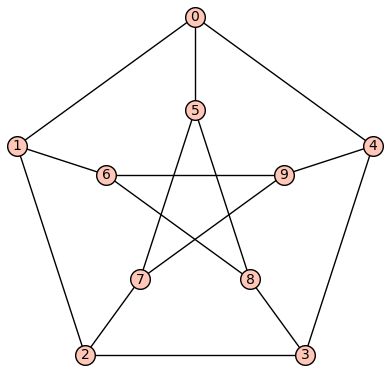

In [5]:
show(G)